In [1]:
# pip install pandas
import pandas as pd
import numpy as np

In [2]:
hist_csv_filename = 'JPM.csv'

In [3]:
def load_past(hist_csv_filename):
    histcolname='Date'
    filedateformat='%Y-%m-%d'
    #yh = pd.read_csv(hist_csv_filename)
    yh = pd.read_csv(
                    hist_csv_filename,
                    #parse_dates=[histcolname],
                    #date_parser=lambda x: datetime.strptime(x,filedateformat),
                    index_col=histcolname)
    yh = yh.rename(columns={'Adj Close': 'AdjClose'})
    return yh

yh=load_past(hist_csv_filename)
yh

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2022-05-31,130.179993,133.149994,129.710007,132.229996,127.951584,17015000
2022-06-01,132.869995,132.869995,128.669998,129.910004,125.706657,10768000
2022-06-02,129.899994,132.009995,128.669998,132.000000,127.729042,8374800
2022-06-03,131.210007,131.770004,129.990005,130.160004,125.948578,8596000
2022-06-06,131.089996,132.389999,129.460007,129.729996,125.532494,11323500
...,...,...,...,...,...,...
2023-05-22,141.000000,141.639999,137.660004,138.029999,138.029999,11402500
2023-05-23,137.539993,139.029999,136.460007,136.589996,136.589996,9514900
2023-05-24,135.399994,136.350006,135.080002,135.339996,135.339996,8578000


In [4]:
def add_columns(df,AdjClose):
    df['LagAdjClose'] = df[AdjClose].shift(1)
    df['DailyLogRet'] = np.log(df[AdjClose]/df['LagAdjClose'])
    return df

In [5]:
yh=add_columns(yh,'AdjClose')

In [6]:
yh.DailyLogRet.describe()

count    249.000000
mean       0.000273
std        0.017309
min       -0.055657
25%       -0.010019
50%        0.000264
75%        0.009317
max        0.072795
Name: DailyLogRet, dtype: float64

In [7]:
# price[t] = price[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * e)

In [8]:
def getstats(df,DailyLogRet):
    sigma = df[DailyLogRet].std()
    mu = df[DailyLogRet].mean()
    cnt = df[DailyLogRet].count()
    return {'sigma':sigma,'mu':mu,'count':cnt}
    
yhs = getstats(yh,'DailyLogRet')
print(yhs)

{'sigma': 0.017308744241388962, 'mu': 0.0002726544013365923, 'count': 249}


In [9]:
# https://en.wikipedia.org/wiki/Geometric_Brownian_motion#Simulating_sample_paths
# Python code for the plot

import matplotlib.pyplot as plt
#from scipy.stats import norm
import math

In [10]:
np.random.seed(1)

In [11]:
def get_path(drift,vol,lastclose):
    dt = 0.1
    x0 = lastclose
    n = 252
    mu = drift # hstats['mu']
    #sigma_ = vol # hstats['sigma']
    sigma = vol # np.array([sigma_]) # [yh.DailyLogRet.std()].to_numpy()

    #sigma = np.arange(yh.DailyLogRet.std(), yh.DailyLogRet.std()+1, 10)
    # print(sigma) = [0.8 1.  1.2 1.4 1.6 1.8]
    #sigma = np.arange(0.8, 2, 0.2)
    sz=1 # len(sigma)
    x = np.exp(
        (mu - sigma ** 2 / 2) * dt
        +
        sigma * np.random.normal(0, np.sqrt(dt), size=(sz, n)).T
    )

    x = np.vstack([np.ones(sz), x])
    x = x0 * x.cumprod(axis=0)
    #print(x.shape)
    rp = x[:,0]
    #print(rp.shape)
    #print(type(rp).__name__)
    df = pd.DataFrame({'px':rp},index=None) # , index=rows, columns=columns)
    #print(df.columns)
    df=add_columns(df,'px')
    ss=getstats(df,'DailyLogRet')
    #print(df)
    print(ss)
    delete_the_first = True # the first is the last of the provided historical prices
    xfut = rp
    if delete_the_first:
        xfut = np.delete(rp, 0) # xfut[0] is going to be = xpast[-1], hence this removal.    
    return xfut # rp

In [12]:
import math

In [13]:
rpath = []
fullpath = []
noPaths = 10
print('hist',yhs)
lastclose = yh.AdjClose.iloc[-1]
for ipath in range(noPaths):
    print(ipath)
    rpath.append(get_path(yhs['mu'],yhs['sigma'],lastclose))
    #print(rpath[ipath])
    #rp=rpath[ipath]
    #df = pd.DataFrame(data=rp,columns=['px'])
    # /math.sqrt(252)

hist {'sigma': 0.017308744241388962, 'mu': 0.0002726544013365923, 'count': 249}
0
{'sigma': 0.005203770514607375, 'mu': 0.00041422423697018006, 'count': 252}
1
{'sigma': 0.00562661687191661, 'mu': 0.00013087409742297708, 'count': 252}
2
{'sigma': 0.005574034607118098, 'mu': 0.00015161364375633596, 'count': 252}
3
{'sigma': 0.005127155663059734, 'mu': 8.597013624150383e-05, 'count': 252}
4
{'sigma': 0.0054709295983523774, 'mu': 0.00029429353448049046, 'count': 252}
5
{'sigma': 0.005670432483368745, 'mu': 0.0007354978008029814, 'count': 252}
6
{'sigma': 0.006018609234999534, 'mu': -0.00039218403612013744, 'count': 252}
7
{'sigma': 0.0052502461870759555, 'mu': 0.00012760630137473856, 'count': 252}
8
{'sigma': 0.005366872889777134, 'mu': 8.021612488694976e-05, 'count': 252}
9
{'sigma': 0.00557214485892431, 'mu': -0.0003341577527589621, 'count': 252}


In [14]:
#import math
#math.sqrt(250)

In [15]:
xpast = yh.AdjClose.values # = yh.AdjClose.to_numpy()
for ipath in range(noPaths):
    print(ipath)
    #print(type(xpast).__name__)
    #print(xpast.shape)
    xfut_z = rpath[ipath]
    xfut = xfut_z 
#    xfut = np.delete(xfut_z, 0) # xfut[0] is going to be = xpast[-1], hence this removal.
    #print(type(xfut).__name__)
    #print(xfut.shape)
    full = np.concatenate([xpast,xfut])
    fullpath.append(full)
    print(len(full))
    #plt.plot(full)
    #print(type(x).__name__)
    print('last 2 xpast',xpast[-2],xpast[-1],'first 2 xfut',xfut[0],xfut[1])


0
502
last 2 xpast 135.669998 136.940002 first 2 xfut 138.1646427498783 137.70447055708019
1
502
last 2 xpast 135.669998 136.940002 first 2 xfut 134.86404648414455 136.303575154975
2
502
last 2 xpast 135.669998 136.940002 first 2 xfut 136.74770107758033 136.8911402425651
3
502
last 2 xpast 135.669998 136.940002 first 2 xfut 136.2307810483625 135.70825360718334
4
502
last 2 xpast 135.669998 136.940002 first 2 xfut 137.36330859462075 138.5086230149739
5
502
last 2 xpast 135.669998 136.940002 first 2 xfut 136.93950666297766 136.89575128249126
6
502
last 2 xpast 135.669998 136.940002 first 2 xfut 137.08308772242947 137.11991558557838
7
502
last 2 xpast 135.669998 136.940002 first 2 xfut 136.32269620633915 137.04551053386226
8
502
last 2 xpast 135.669998 136.940002 first 2 xfut 138.05281567939937 136.47413925928802
9
502
last 2 xpast 135.669998 136.940002 first 2 xfut 134.66410670117756 134.75082676579393


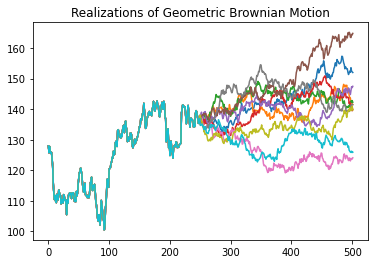

In [16]:
for ipath in range(noPaths):
    plt.plot(fullpath[ipath])
    plt.title("Realizations of Geometric Brownian Motion")
#plt.show()

In [17]:
# now merge with M:\DEV\A-MOSCATELLI-WIKI\next_timeseries-accumulator

# part 2 - simulation

In [18]:
import yaml  # pip install pyyaml
from datetime import datetime, timedelta

In [19]:
def load_contract_spec(contract):
    with open(contract, 'r') as file:
        contract_spec = yaml.safe_load(file)
        if False:
            contract_spec['dates']['startdate'] = datetime.strptime(contract_spec['dates']['startdate'],   contract_spec['dates']['dateformat'])
            contract_spec['dates']['enddate']   = datetime.strptime(contract_spec['dates']['enddate'],     contract_spec['dates']['dateformat'])
        # 2022-07-08
            del contract_spec['dates']['dateformat']
        #print(contract_spec)
        return contract_spec


In [20]:
class Hdf:
    df = None
    def _dbg(self,trace):
        print('count of dates after','<'+trace+'>',':',self.df.shape[0])
    #def __init__(self):
        #self._dbg('init')
    
    def load_df(self,df):
        self.df = df
        
    def load_csv(self, hist_csv_filename,histcolname,filedateformat):
        self.df = pd.read_csv(
                    hist_csv_filename,
                    parse_dates=[histcolname],
                    date_parser=lambda x: datetime.strptime(x,filedateformat),
                    index_col=histcolname)
        self._dbg('init')
        # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/ follows the same steps
        False and print(self.df.dtypes)

    def withSignal(self,colname,lambdasignal,activation):
        assert False
        assert activation in ['up','down']
        self.df[colname] = self.df.apply(lambda row: lambdasignal(row), axis=1).copy()
        fdf = self.df[self.df[colname]]
        if fdf.shape[0]>=0:
            activation_index = fdf.index[0]
            print('activation_index',activation_index)
            if activation=='up':
                self.df[colname] = self.df.apply(lambda row: row.name >= activation_index, axis=1).copy()
            if activation=='down':
                self.df[colname] = self.df.apply(lambda row: row.name <= activation_index, axis=1).copy()
        self._dbg(colname)
        return self

In [21]:
def hist(field,date,dayoffset):
    assert dayoffset <= 0
    # date is str
    #date_ = datetime.strptime(date,"%Y-%m-%d")
    #date2 = date + timedelta(days=dayoffset)	# may not be included in the df
    #print('hist:',date,field,dayoffset,date2)
    ret = hdf.df.shift(dayoffset).at[date,field]
    #print('shifted hist:',hdf.df.shift(dayoffset).loc[date])
    #ret = hdf.df.at[date2,field]
    #print('ret:',ret)
    if not ret: ret=0
    return ret


## start

In [22]:
folder = r'M:\DEV\github__a_moscatelli\repositories\home\am-wiki-assets\equityaccumulator'+'\\'

In [23]:
contract = folder + 'contract.yml'
in_csv_filename = folder + 'jpm.csv'
#contract_spec = load_contract_spec(contract)

In [24]:
lastdate=yh.index[-1]
#lastdt=datetime.strptime(lastdate,"%Y-%m-%d")
futdt = []

def getnextdt(lastdt,considerPublicHolidays, useStrings):
    assert not considerPublicHolidays
    if useStrings:
        lastdt=datetime.strptime(lastdt,"%Y-%m-%d")
    dow_eur=lastdt.strftime("%a")
    #print(lastdt,dow_eur)
    offset=1
    if dow_eur=='Fri': offset=3
    if dow_eur=='Sat': offset=2
    
    lastdt = lastdt + timedelta(days=offset)
    if useStrings:
        return datetime.strftime(lastdt,"%Y-%m-%d")
    else:
        return lastdt


curdt=lastdate
fullpathx=fullpath[0]
for px in fullpathx:
    curdt=getnextdt(curdt,False,True)
    futdt.append(curdt)
    #print(px)
    #pass

#lastdt+1
#print(lastdate,lastdt,lastdt,dow_eur)


In [25]:
futdf = pd.DataFrame({'AdjClose':fullpathx},index=futdt)
fulldf = pd.concat([yh,futdf])


In [26]:
contract_spec = load_contract_spec(contract)
#hdf0 = Hdf(in_csv_filename,'Date',contract_spec['dates']['filedateformat'])
hdf0 = Hdf()
hdf0.load_df(fulldf)

assert max(True,False)==True and min(True,False)==False


In [27]:
#contract_spec

In [28]:
import math

In [29]:
def compute1(hdf,contract_spec):
    #print(contract_spec['dates']['startdate'], contract_spec['dates']['enddate'])
    hdf.df['live'] = hdf.df.apply(lambda row:  contract_spec['dates']['startdate'] <= row.name <= contract_spec['dates']['enddate'], axis=1)
    hdf.df['KI'] = hdf.df.apply(lambda row:  row.live and eval(contract_spec['knock-in'],{'row':row}), axis=1).cummax()
    # the input of cummax is a df column having true when the KI condition is met. cummax() keeps confirming True in the future once met. cummax = carryover of True.
    hdf.df['KO'] = hdf.df.apply(lambda row:  row.KI and eval(contract_spec['knock-out'],{'row':row}), axis=1).cummax()
    hdf.df['accumulation'] = hdf.df['KI'] & ~hdf.df['KO']
    # bitwise is inside the KI zone and not inside the KO zone
    return hdf


hdf = compute1(hdf0,contract_spec)

print('accumulation start:',hdf.df.loc[hdf.df.accumulation].head(1).index.values[0]) # .loc[hdf.df['accumulation']==True].idxmin())
print('accumulation stop:',hdf.df.loc[hdf.df.accumulation].tail(1).index.values[0]) # .loc[hdf.df.accumulation==True].idxmax())


accumulation start: 2022-07-14
accumulation stop: 2023-01-12


In [30]:
def compute2(hdf,contract_spec):

    hdf.df.insert(0, 'SN', range(0, 0 + len(hdf.df)))

    hdf.df['BQty']  = hdf.df.apply(lambda row: row.accumulation and eval(contract_spec['buy']['qty'],  {'row':row, 'math':math,'hist':hist,'T':row.name}), axis=1)
    hdf.df['BAt']   = hdf.df.apply(lambda row: row.accumulation and eval(contract_spec['buy']['at'],   {'row':row, 'math':math,'hist':hist,'T':row.name}), axis=1)
    hdf.df['BWhen'] = hdf.df.apply(lambda row: row.accumulation and eval(contract_spec['buy']['when'], {'row':row, 'math':math,'hist':hist,'T':row.name}), axis=1)
    hdf.df['SQty']  = hdf.df.apply(lambda row: row.accumulation and eval(contract_spec['sell']['qty'], {'row':row, 'math':math,'hist':hist,'T':row.name}), axis=1)
    hdf.df['SAt']   = hdf.df.apply(lambda row: row.accumulation and eval(contract_spec['sell']['at'],  {'row':row, 'math':math,'hist':hist,'T':row.name}), axis=1)
    hdf.df['SWhen'] = hdf.df.apply(lambda row: row.accumulation and eval(contract_spec['sell']['when'],{'row':row, 'math':math,'hist':hist,'T':row.name}), axis=1)
    #cashflow
    hdf.df['BCF']   = hdf.df.apply(lambda row: row.accumulation and row.BWhen and - (row.BQty * row.BAt),axis=1)
    hdf.df['SCF']   = hdf.df.apply(lambda row: row.accumulation and row.SWhen and + (row.SQty * row.SAt),axis=1)
    #cumul
    hdf.df['CumQty']= hdf.df.apply(lambda row: row.BWhen and row.BQty - row.SWhen and row.SQty , axis=1).cumsum()
    hdf.df['CumCF'] = hdf.df.apply(lambda row: row.BCF + row.SCF, axis=1).cumsum()
    return hdf

hdf = compute2(hdf,contract_spec)

In [31]:
hdf.df

,SN,Open,High,Low,Close,AdjClose,Volume,LagAdjClose,DailyLogRet,live,...,BQty,BAt,BWhen,SQty,SAt,SWhen,BCF,SCF,CumQty,CumCF
2022-05-31,0,130.179993,133.149994,129.710007,132.229996,127.951584,17015000.0,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,0.000000
2022-06-01,1,132.869995,132.869995,128.669998,129.910004,125.706657,10768000.0,127.951584,-0.017701,False,...,False,False,False,False,False,False,False,False,0,0.000000
2022-06-02,2,129.899994,132.009995,128.669998,132.000000,127.729042,8374800.0,125.706657,0.015960,True,...,False,False,False,False,False,False,False,False,0,0.000000
2022-06-03,3,131.210007,131.770004,129.990005,130.160004,125.948578,8596000.0,127.729042,-0.014037,True,...,False,False,False,False,False,False,False,False,0,0.000000
2022-06-06,4,131.089996,132.389999,129.460007,129.729996,125.532494,11323500.0,125.948578,-0.003309,True,...,False,False,False,False,False,False,False,False,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,747,NaN,NaN,NaN,NaN,152.058752,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,110,5357.558143
2025-04-24,748,NaN,NaN,NaN,NaN,153.575029,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,110,5357.558143
2025-04-25,749,NaN,NaN,NaN,NaN,152.483229,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,110,5357.558143
2025-04-28,750,NaN,NaN,NaN,NaN,152.197438,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,110,5357.558143


In [ ]:
plt.plot(hdf.df["CumCF"]) #, df["Y"])
plt.show()